<a href="https://colab.research.google.com/github/RUBAIATH-E-ULFATH/IOT-Intrusion-Detection-System-using-Deep-Learning/blob/main/IOT_IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset & Import Necessary Modules



### Load Dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
### UNZIP
!unzip "/content/drive/MyDrive/CIDDS-001-internal-week1.zip" -d "/content"

Archive:  /content/drive/MyDrive/CIDDS-001-internal-week1.zip
  inflating: /content/CIDDS-001-internal-week1.csv  


### Import Modules

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.models import Model, load_model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, InputLayer, Flatten, LeakyReLU, SeparableConv2D, Activation,Conv2D , MaxPool2D  , Dropout , BatchNormalization, concatenate, Conv2DTranspose, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.callbacks import ReduceLROnPlateau


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/phishing_dataset.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.head(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---


### Predictor & Target Variable Split

In [ ]:
X=df.iloc[:,1:12]
y=df[['class']]

### Feature Engineering

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451520 entries, 0 to 8451519
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Duration     float64
 1   Proto        object 
 2   Src IP Addr  object 
 3   Src Pt       int64  
 4   Dst IP Addr  object 
 5   Dst Pt       float64
 6   Packets      int64  
 7   Bytes        object 
 8   Flows        int64  
 9   Flags        object 
 10  Tos          int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 709.3+ MB


In [ ]:
X = X.drop(columns=['Src IP Addr', 'Dst IP Addr', 'Src Pt', 'Bytes']) # Feature Selection

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451520 entries, 0 to 8451519
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Duration  float64
 1   Proto     object 
 2   Dst Pt    float64
 3   Packets   int64  
 4   Flows     int64  
 5   Flags     object 
 6   Tos       int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 451.4+ MB


In [ ]:
# X['Src IP Addr'].value_counts()

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451520 entries, 0 to 8451519
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   class   object
dtypes: object(1)
memory usage: 64.5+ MB


In [ ]:
y["class"].value_counts() # Need of one hot encoding to 3 classes

normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64

In [ ]:
X["Flags"].value_counts() # Label Encoding Needed

4     2652182
0     1057702
12    1049867
14     848656
15     834847
7      638075
5      613708
13     254596
6      200000
1      114749
8       82399
2       46718
17      29520
9        9743
16       5810
19       4821
18       3850
3        3174
10        821
11        282
Name: Flags, dtype: int64

In [ ]:
X["Proto"].value_counts() # Label Encoding Needed

TCP      7393818
UDP      1047279
ICMP       10177
IGMP         246
Name: Proto, dtype: int64

In [ ]:
X['Bytes'].value_counts()

      66    2256100
      54     359338
      55     293995
     108     263026
206          236488
             ...   
  140353          1
  145314          1
  117580          1
  315463          1
   32528          1
Name: Bytes, Length: 94131, dtype: int64

In [ ]:
X['Src Pt'].value_counts()

80       1872487
443      1492927
53        492201
445       147006
8082       56116
          ...   
61717          5
63616          4
3480           2
3478           2
19302          1
Name: Src Pt, Length: 33689, dtype: int64

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
X['Flags'] = LabelEncoder().fit_transform(X['Flags'])

In [ ]:
X['Proto'] = LabelEncoder().fit_transform(X['Proto'])

In [ ]:
y['class'] = LabelEncoder().fit_transform(y['class'])

### Split Train - Test - Valdiation Set

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.15, random_state=15, stratify= y_train)

In [ ]:
X.shape

(8451520, 7)

###One Hot Encoding


In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_dev = to_categorical(y_dev, 3)

# Multi Layer Perceptron Model

### Model Building

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
  
    layers.Dense(128, input_dim=7, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 17,795
Trainable params: 17,795
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC','accuracy', 'Precision', 'Recall'])

### Model Training

In [ ]:
history = model.fit(X_train, y_train, epochs=1, validation_data= (X_dev, y_dev))

179595/179595 [==============================] - 821s 5ms/step - loss: 0.3321 - auc: 0.7731 - accuracy: 0.8999 - precision: 0.8632 - recall: 0.6133 - val_loss: 0.3067 - val_auc: 0.7823 - val_accuracy: 0.8998 - val_precision: 0.8730 - val_recall: 0.6558


### Training Performance Evalutaion

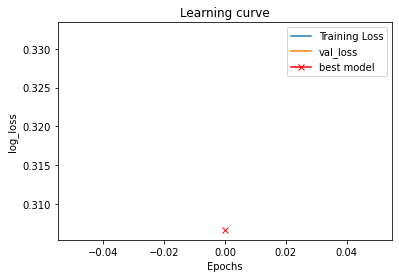

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

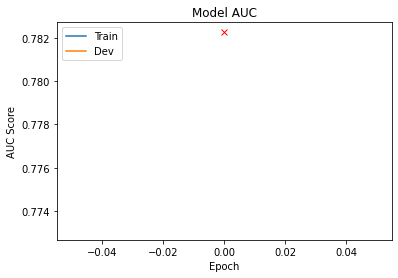

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.plot( np.argmax(history.history["val_auc"]), np.max(history.history["val_auc"]), marker="x", color="r", label="best model")
plt.title('Model AUC')
plt.ylabel('AUC Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

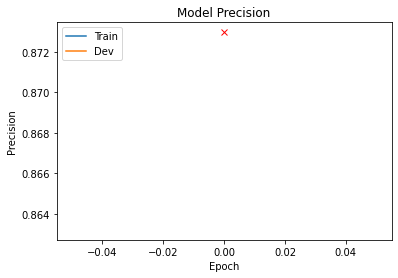

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.plot( np.argmax(history.history["val_precision"]), np.max(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

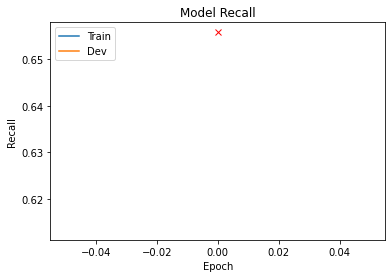

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.plot( np.argmax(history.history["val_recall"]), np.max(history.history["val_recall"]), marker="x", color="r", label="best model")
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

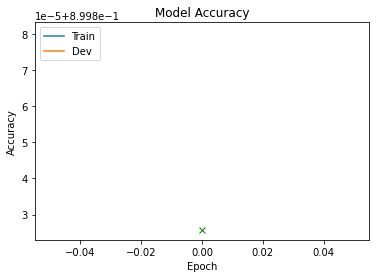

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot( np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="g", label="best model")

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

### Perfomance Evalution on Testing Data

In [ ]:
model.evaluate(X_test,  y_test, verbose=1)

52822/52822 [==============================] - 190s 4ms/step - loss: 0.3074 - auc: 0.7830 - accuracy: 0.8997 - precision: 0.8731 - recall: 0.6569


[0.3074122667312622,
 0.783013105392456,
 0.8997334241867065,
 0.8730521202087402,
 0.6569480895996094]